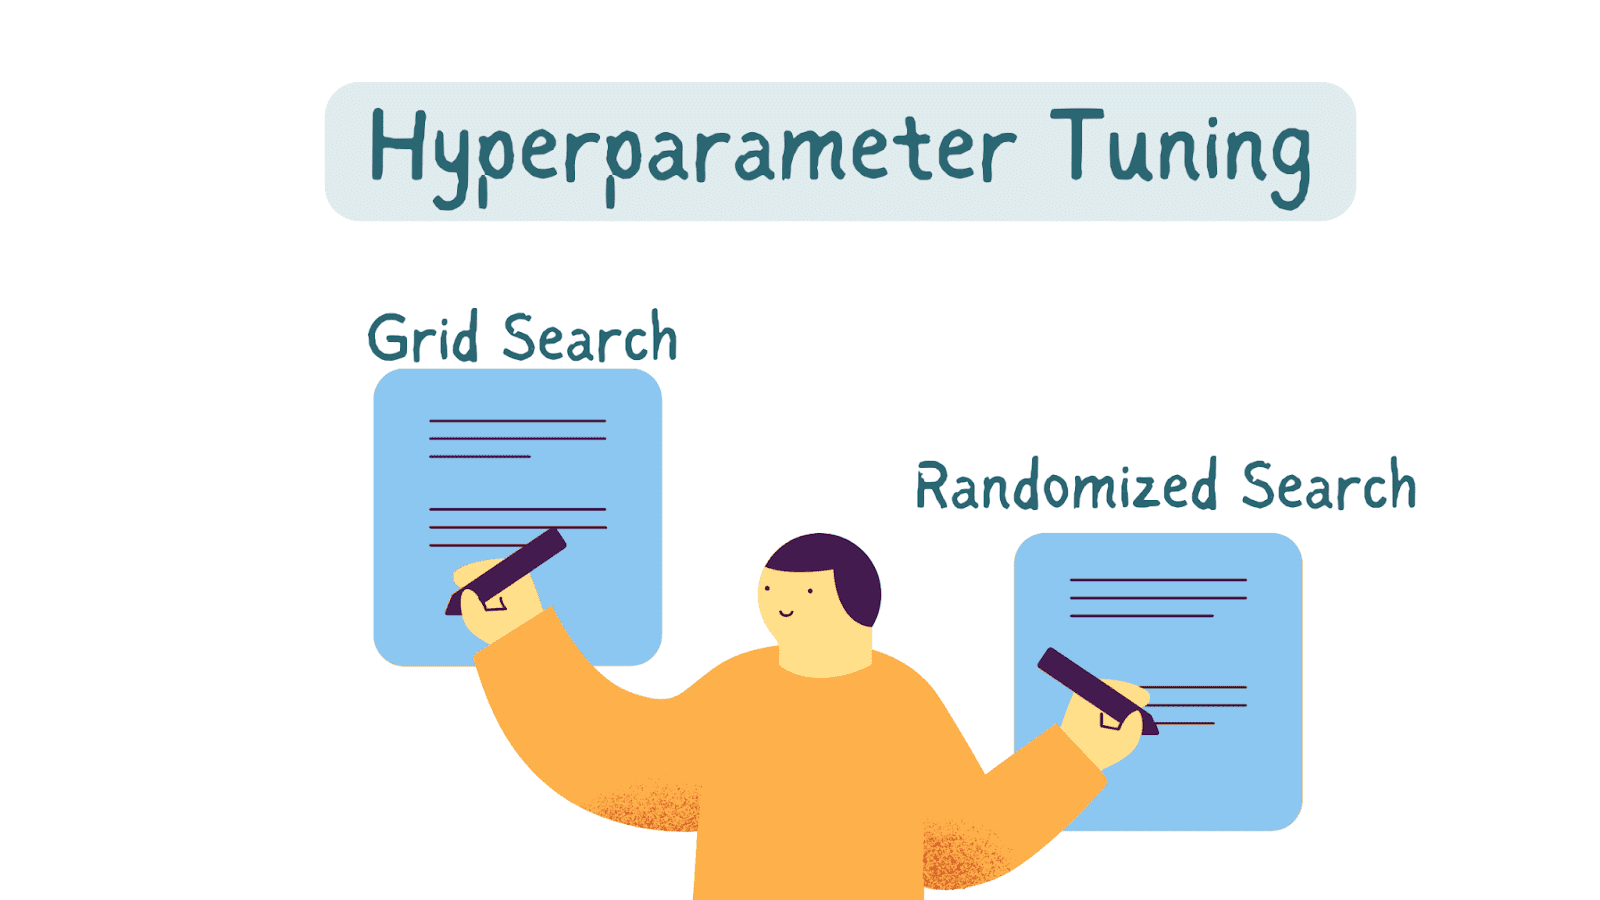

In [23]:
from IPython.display import Image

Image('/content/c_hyperparameter_tuning_gridsearchcv_randomizedsearchcv_explained_2.png')

# Hyperparameter Tuning: GridSearchCV and RandomizedSearchCV, Explained


#Introduction
All machine learning models have a set of hyperparameters or arguments that must be specified by the practitioner.

1-For example, a logistic regression model has different solvers that are used to find coefficients that can give us the best possible output. Each solver uses a different algorithm to find an optimal result, and none of these algorithms are strictly better than the other. It is difficult to tell which solver will perform the best on your dataset unless you try all of them.

2-The best hyperparameter is subjective and differs for every dataset. The Scikit-Learn library in Python has a set of default hyperparameters that perform reasonably well on all models, but these are not necessarily the best for every problem.

3-The only way to find the best possible hyperparameters for your dataset is by trial and error, which is the main concept behind hyperparameter optimization.

4-In simple words, hyperparameter optimization is a technique that involves searching through a range of values to find a subset of results that achieve the best performance on a given dataset.

There are two popular techniques used to perform hyperparameter optimization - grid and random search.





# Grid Search
When performing hyperparameter optimization, we first need to define a parameter space or parameter grid, where we include a set of possible hyperparameter values that can be used to build the model.

The grid search technique is then used to place these hyperparameters in a matrix-like structure, and the model is trained on every combination of hyperparameter values.

The model with the best performance is then selected.

#Random Search
While grid search looks at every possible combination of hyperparameters to find the best model, random search only selects and tests a random combination of hyperparameters.

This technique randomly samples from a grid of hyperparameters instead of conducting an exhaustive search.

We can specify the number of total runs the random search should try before returning the best model.

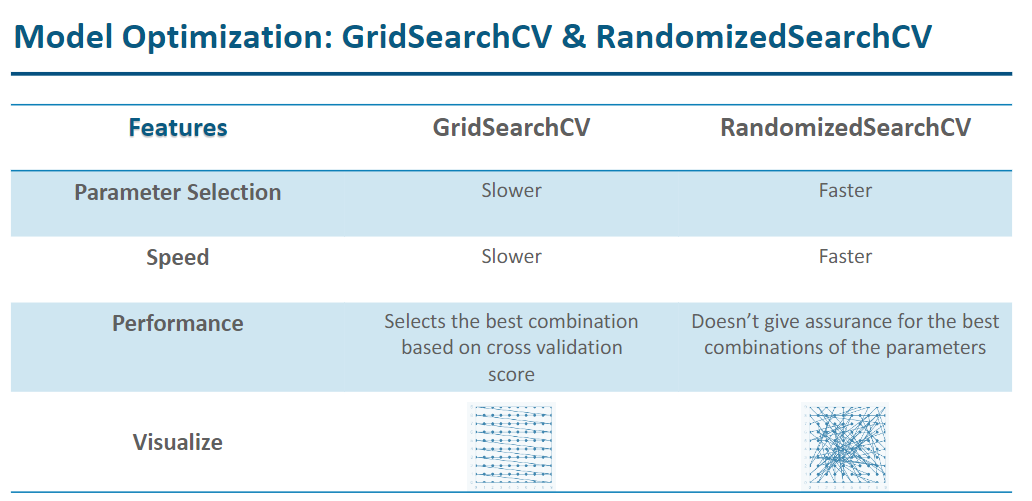

In [21]:
Image('/content/asd.PNG')

#Optimizing a Random Forest Classifier Using Grid Search and Random Search

#Step 1: Loading the Dataset


In [2]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Step 2: Data Preprocessing
The target variable “quality” contains values ranging between 1 and 10.

We will turn this into a binary classification task by assigning a value of 0 to all data points with a quality value of less than or equal to 5, and a value of 1 to the remaining observations:

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
import numpy as np

df['target'] = np.where(df['quality']>5, 1, 0)

In [7]:
#Let’s split the dependent and independent variables in this dataframe:
df2 = df.drop(['quality'],axis=1)
X = df2.drop(['target'],axis=1)
y = df2[['target']]

#Step 3: Building the Model


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#Step 4: Implementing Grid Search with Scikit-Learn

# Defining the Hyperparameter Space


**We will now try adjusting the following set of hyperparameters of this model:**

**1-“Max_depth”**: This hyperparameter represents the maximum level of each tree in the random forest model. A deeper tree performs well and captures a lot of information about the training data, but will not generalize well to test data. By default, this value is set to “None” in the Scikit-Learn library, which means that the trees are left to expand completely.

**2-“Max_features”**: The maximum number of features that the random forest model is allowed to try at each split. By default in Scikit-Learn, this value is set to the square root of the total number of variables in the dataset.

**3-“N_estimators”**: The number of decision trees in the forest. The default number of estimators in Scikit-Learn is 10.

**4-“Min_samples_leaf”**: The minimum number of samples required to be at the leaf node of each tree. The default value is 1 in Scikit-Learn.

**5-“Min_samples_split”**: The minimum number of samples required to split an internal node of each tree. The default value is 2 in Scikit-Learn.


We will now create a dictionary of multiple possible values for all the above hyperparameters. This is also called the hyperparameter space, and will be searched through to find the best combination of arguments:

In [9]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

**Running Grid Search**


Now, we need to perform the search to find the best hyperparameter combination for the model:

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X,y)

**Evaluating Model Results**

Finally, let’s print out the best model accuracy, along with the set of hyperparameters that yielded this score:

In [11]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score is: 0.7373358348968105


#Step 5: Implementing Random Search Using Scikit-Learn
**Defining the Hyperparameter Space**


Now, let’s define the hyperparameter space to implement random search. This parameter space can have a bigger range of values than the one we built for grid search, since random search does not try out every single combination of hyperparameters.

It randomly samples hyperparameters to find the best ones, which means that unlike grid search, random search can look through a large number of values quickly.

In [15]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }


In [24]:
total_combination =10*9*7*2*4*5   # if we take all evement from every list
total_combination

25200

**Running Random Search**


Run the following lines of code to run random search on the model: (Note that we have specified n_iter=500, which means that the random search will run 500 times before choosing the best model. You can experiment with a different number of iterations to see which one gives you optimal results. Keep in mind that a large number of iterations will result in better performance but is time-consuming).

In [17]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, param_distributions=rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


**Evaluating Model Results**
Now, run the following lines of code to print the best hyperparameters found by random search, along with the highest accuracy of the best model:

In [18]:
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 160}
Best score is: 0.7360850531582238


Observe that both grid search and random search performed reasonably well on the dataset. Keep in mind that if you were to run a random search on the same code, your results may end up being very different from what I’ve displayed above.

This is because it is searching through a very large parameter grid using random initialization, which can render results that vary dramatically each time you use the technique.

# Grid Search vs Random Search - Which One To Use?
**If you ever find yourself trying to choose between grid search and random search, here are some pointers to help you decide which one to use:**

1-Use grid search if you already have a ballpark range of known hyperparameter values that will perform well. Make sure to keep your parameter space small, because grid search can be extremely time-consuming.

2-Use random search on a broad range of values if you don’t already have an idea of the parameters that will perform well on your model. Random search is faster than grid search and should always be used when you have a large parameter space.

3-It is also a good idea to use both random search and grid search to get the best possible results.